In [1]:
import numpy as np
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from hydra import initialize, compose
import galsim

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.instruments.hwo import HWO
from mejiro.synthetic_image import SyntheticImage
from mejiro.lenses.test import SampleStrongLens
from mejiro.exposure import Exposure

Computing on pixel grid of size 625x625 (5.0"x5.0") with pixel scale 0.008 arcsec/pixel (natively 0.04 arcsec/pixel oversampled by factor 5)
Initialized SyntheticImage for StrongLens SAMPLE by HWO in J band


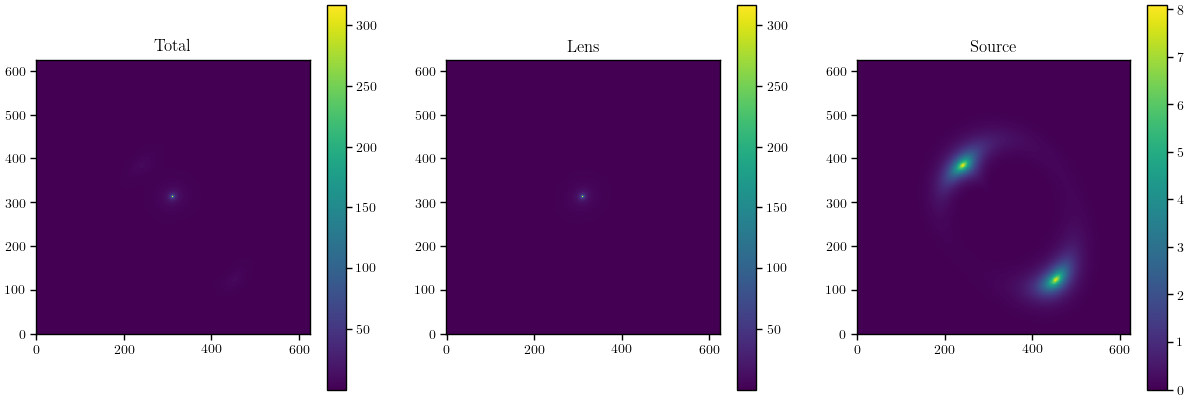

In [2]:
lens = SampleStrongLens()
hwo = HWO()
band = 'J'
scene_size = 5  # arcsec
oversample = 5
exposure_time = 1000
rng = galsim.UniformDeviate(42)

synth = SyntheticImage(lens, hwo, band, arcsec=scene_size, oversample=oversample, pieces=True)

_, ax = plt.subplots(1, 3, figsize=(15, 5))
ax0 = ax[0].imshow(synth.image)
ax1 = ax[1].imshow(synth.lens_surface_brightness)
ax2 = ax[2].imshow(synth.source_surface_brightness)
ax[0].set_title('Total')
ax[1].set_title('Lens')
ax[2].set_title('Source')
plt.colorbar(ax0, ax=ax[0])
plt.colorbar(ax1, ax=ax[1])
plt.colorbar(ax2, ax=ax[2])
plt.show()

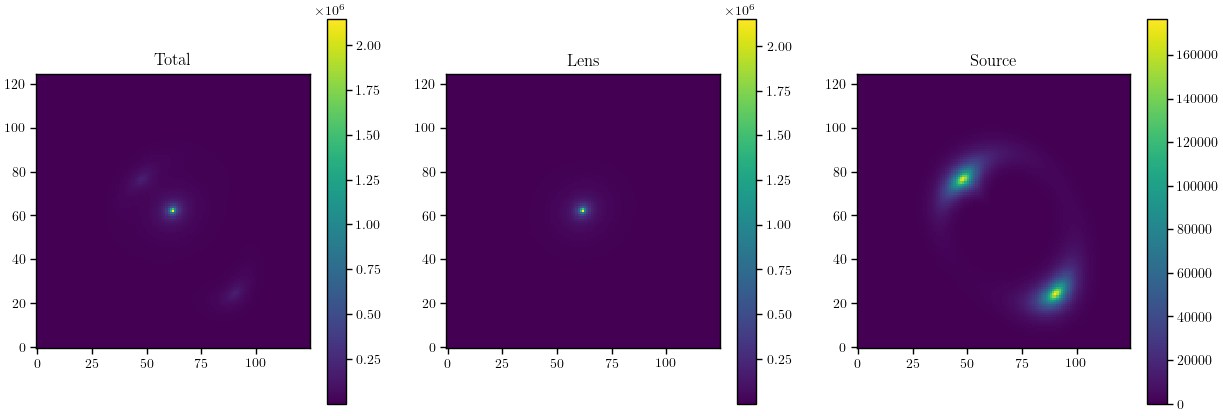

In [10]:
exposure = Exposure(synth, exposure_time=exposure_time)

_, ax = plt.subplots(1, 3, figsize=(15, 5))
ax0 = ax[0].imshow(exposure.exposure)
ax1 = ax[1].imshow(exposure.lens_exposure)
ax2 = ax[2].imshow(exposure.source_exposure)
ax[0].set_title('Total')
ax[1].set_title('Lens')
ax[2].set_title('Source')
plt.colorbar(ax0, ax=ax[0])
plt.colorbar(ax1, ax=ax[1])
plt.colorbar(ax2, ax=ax[2])
plt.show()

[]


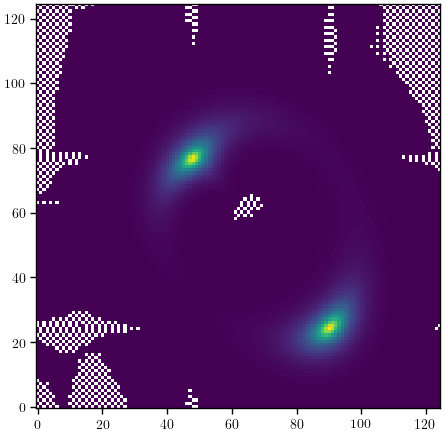

In [12]:
print(exposure.source_exposure[exposure.source_exposure < 0])

exposure.source_exposure[exposure.source_exposure < 0] = np.nan

plt.imshow(exposure.source_exposure)
plt.show()

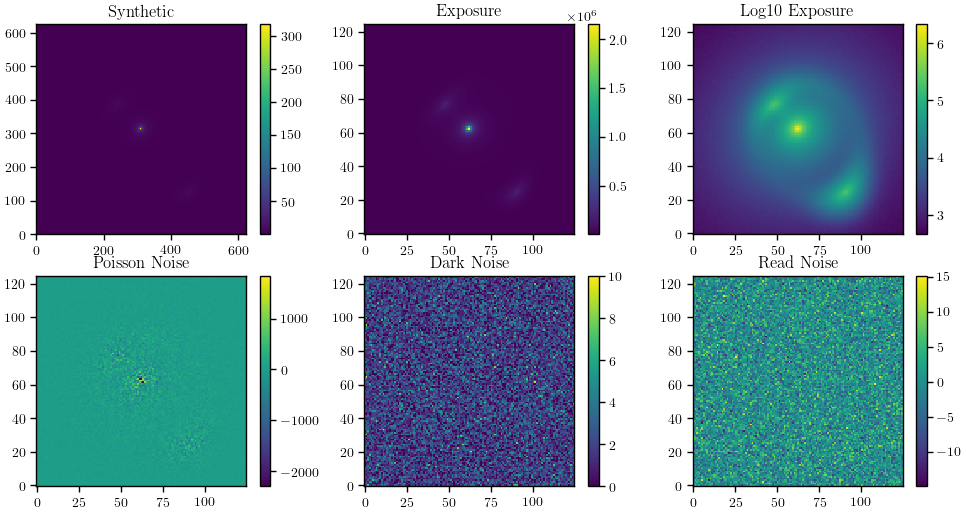

In [4]:
_, ax = plt.subplots(2, 3, figsize=(12, 6))
ax00 = ax[0, 0].imshow(synth.image)
ax01 = ax[0, 1].imshow(exposure.exposure)
ax02 = ax[0, 2].imshow(np.log10(exposure.exposure))
ax10 = ax[1, 0].imshow(exposure.poisson_noise.array)
ax11 = ax[1, 1].imshow(exposure.dark_noise.array)
ax12 = ax[1, 2].imshow(exposure.read_noise.array)
plt.colorbar(ax00, ax=ax[0, 0])
plt.colorbar(ax01, ax=ax[0, 1])
plt.colorbar(ax02, ax=ax[0, 2])
plt.colorbar(ax10, ax=ax[1, 0])
plt.colorbar(ax11, ax=ax[1, 1])
plt.colorbar(ax12, ax=ax[1, 2])
ax[0, 0].set_title('Synthetic')
ax[0, 1].set_title('Exposure')
ax[0, 2].set_title('Log10 Exposure')
ax[1, 0].set_title('Poisson Noise')
ax[1, 1].set_title('Dark Noise')
ax[1, 2].set_title('Read Noise')
plt.show()